# MTH 306 PYTHON LAB 1 - DUE FEB 14 at 11:59 pm EST

This Jupyter notebook will walk you through using Python to verify solutions to differential equations and plotting particular solutions and slope fields. The first part, taken from our textbook, is done for you as an example. ***You should complete the section below headered with "Now it's your turn!".*** To hand in this Python Lab you should print this document as a pdf, create a pdf of your handwritten solutions, and then merge the two pdfs into one (there are many web sources for doing this). This new pdf should be uploaded to Gradescope by the deadline.

### First we need to import our dependencies. You will need to download and save the resources306.py file (available at <https://github.com/UBmath/306> or on UB Learns) in the same directory as all of your other Python files, including this one. 

In [2]:
from resources306 import *

SyntaxError: invalid syntax (resources306.py, line 7)

The file resources306.py automatically imports numpy as np, sympy as sp, and matplotlib as plt.

## Verifying and Plotting Solutions

We can easily use Python to verify and plot solutions to differential equations. Suppose we have the following differential equation:

$$ \frac{dx}{dt} + x = 2\cos(t)$$

and we are asked to show that any function $x(t)$ in the form

$$ x(t) = \cos(t) + \sin(t) + Ce^{-t}$$

for a constant $C$ is a solution to this equation. 

First we should construct the alleged family of solutions:

In [3]:
t,C = sp.symbols('t C')
x = sp.cos(t) + sp.sin(t) + C*sp.exp(-t)
x

NameError: name 'sp' is not defined

Then to verify that they all satisfy the differential equation $\frac{dx}{dt} + x = 2 \cos(t)$ we can ask Python!

In [3]:
sp.diff(x,t) + x == 2*sp.cos(t)  # Python will return true if the equality holds and false if it does not.

True

Checking "LHS == RHS" tests whether the two expressions are identical: it will ***not*** catch if they are different but equivalent, like $\cos^2(t)$ and $1 - \sin^2(t)$. A more robust tactic is to test if "LHS - RHS" simplifies to 0. 

In [4]:
sp.simplify( sp.diff(x,t) + x - 2*sp.cos(t) ) == 0

True

### Plot a few solutions:

Now suppose we want to create and plot several solutions in the given family of solutions. The code below creates a list of three solutions by substituting in the values $C$ for $C = -2,0,1$. To plot these solutions we can use the expressionplot function from resources306.py. 

In [5]:
afewsolutions = [x.subs({C:c}) for c in [-2,0,1]]
afewsolutions

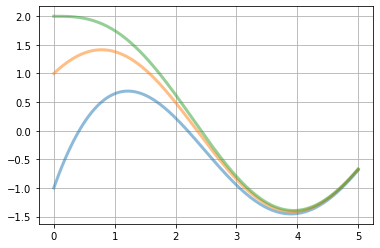

In [6]:
for solution in afewsolutions:
    expressionplot( solution, t, 0, 5 ) # The last two numbers here tell Python to plot the solution on [0,5]
plt.grid()
plt.show()

## Plotting Slop Fields

If we have a differential equation of the form $\frac{dy}{dx} = f(x,y)$ we can plot a slope field to get a sense of the behavior of the solution curves to the equation without having to explicitly solve for them. For example, suppose we have the following differential equation

$$\frac{dy}{dx} = x^2 - y$$

then we can use the function slopefieldplot in resources306.py to plot its corresponding slope field for $-2\leq x,y \leq2$.

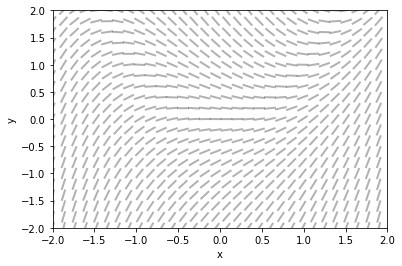

In [7]:
def f(x,y):  
    return x**2 - y  # If you have functions like sine or cosine or exp in this function use np instead of sp.

slopefieldplot( f, -2,2, -2,2, .2, lw=2 )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we happen to know solutions solutions $y(x)$ to this differential equation we can plot them on the slope field using the expressionplot function. 

In [8]:
x = sp.symbols('x')
y1 = x**2 - 2*x + 2 # Our first solution
y2 = ((x**2 - 2*x + 2)*sp.exp(x)-3)*sp.exp(-x) # Our second solution

y1,y2

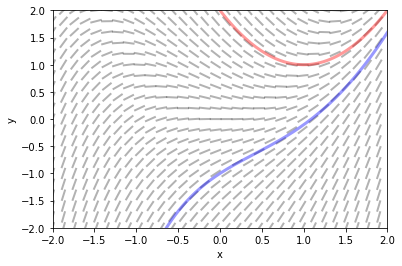

In [9]:
slopefieldplot( f, -2,2, -2,2, .2, lw=2 )
expressionplot(y1,x,-2,2,color='r',alpha=0.4,lw=3)
expressionplot(y2,x,-2,2,color='b',alpha=0.4,lw=3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

=================================================================================================================

# Now it's your turn!

### Part 1: Graphing with Python

#### For each of the two following differential equations and supplied general solutions you should:

1) Verify that the supplied general solution is indeed a solution of the differential equation.

2) Create a list of particular solutions for the constants $C$ provided.

3) Plot all of your particular solutions on the same graph. 

**Hint: Follow the examples above.**

#### Equation 1: $$\frac{dx}{dt} - 3x = 4e^{3t}\cos(t)$$  

$$x(t) = 4e^{3t}\sin(t) + Ce^{3t}$$

Use constants $C = -1,0,2$ and $-2 \leq t \leq 0$

**Solution:**

In [10]:
# Delete this text and write you answer here. If you need another cell go to Insert -> Insert Cell

####  Equation 2: $$\frac{dx}{dt} - \frac{x}{t} =  5t^2 - 3$$

$$ x(t) = \frac{5}{2}t^3 - 3t\ln(t) + Ct$$

Use constants $C = -4,0,4$ and $0 \leq t \leq 2$. Hint: use sp.log(t) for $\ln(t)$.

#### Solution:

In [11]:
# Delete this text and write you answer here. If you need another cell go to Insert -> Insert Cell

### Now consider the following differential equation:

$$ \frac{dy}{dx} = xy + x + y + 1$$

#### Create a slope field plot for this differential equation.

#### Solution:

In [12]:
# Delete this text and write you answer here. If you need another cell go to Insert -> Insert Cell

#### It can be shown, using separation of variables, that the general solution to this equation is 

$$ y = Ce^{\frac{x^2}{2} + x} -1$$ 

#### Using various values for $C$, plot at least 8 particular solutions on top of the slope field for this equation. To get a good picture let graph window be $-4 \leq x \leq 2$ and $-4 \leq y \leq 4$.

#### Solution:

In [13]:
# Delete this text and write you answer here. If you need another cell go to Insert -> Insert Cell

 ### Part 2: Application to Population Dynamics

It has been well shown that the population (subject to constraints like food availability) at time $t$ of a species, call it $P(t)$, satisfies the following logistic differential equation: 

$$ \frac{dP}{dt} = \frac{r}{K}P \left(K-P\right)$$

where $P$ is the population at time $t$, $K$ is the carrying capacity of the environment (i.e. the number of organisms the environment can sustain), and $r$ is the intrinsic rate of growth of the population. Note that $K$ and $r$ are constants which depend on the the organism and the environment. $P$ is the dependent variable and $t$ is the independent variable.

#### Question 1: Using the method of Separation of Variables, it can be shown that the general solution to the logistic differential equation is

$$P(t) = \frac{CKe^{rt}}{1 + Ce^{rt}}$$ 

#### Use Python to verify that this is indeed a solution to the differential equation.

#### Solution: 

In [14]:
# Delete this text and write you answer here. If you need another cell go to Insert -> Insert Cell

#### Question 2: What is the initial population, $P_0$, at time $t = 0$ ? Your answer should be in terms of $r,K,$ and $C$. 

**Solution:**

In [15]:
# You can change this cell to a text cell by selecting Cell -> Cell Type -> Markdown.
# If you prefer, you can write you answer on paper and submit all your written answers in
# a single pdf with this Jupyter notebook.

Now suppose we are talking about a pond of fish with a carrying capacity of 1000 fish (i.e. $K = 1000$) and intrinsic growth rate of $r = 0.3$. Here $P(t)$ will be the amount of fish in the pond after $t$ months.

#### Question 3: What is the population of fish in the pond after $t$ months? 

**Solution:** 

In [16]:
# You can change this cell to a text cell by selecting Cell -> Cell Type -> Markdown.
# If you prefer, you can write you answer on paper and submit all your written answers in
# a single pdf with this Jupyter notebook.

#### Question 4: Using Python, plot the population of fish in the pond for initial populations $P_0 = 200,400,800,$ and $1200$ over the first year all on the same graph. Hint: Use your answer to question two to help you find the corresponding constants $C$.

**Solution:**

In [17]:
# Delete this text and write your code here.

#### Question 5: Interpret the graphs of these solutions. What are some reasons for the different behaviors demonstrated by the population curve corresponding to the different initial populations?

**Solution:**

In [18]:
# You can change this cell to a text cell by selecting Cell -> Cell Type -> Markdown.
# If you prefer, you can write you answer on paper and submit all your written answers in
# a single pdf with this Jupyter notebook.

#### Question 6: At what population is the rate of change of fish at a maximum? You should be able to give an exact answer, don't just guess.

**Solution:**

In [19]:
# You can change this cell to a text cell by selecting Cell -> Cell Type -> Markdown.
# If you prefer, you can write you answer on paper and submit all your written answers in
# a single pdf with this Jupyter notebook.

## Part 3: Textbook Problems

#### Complete the following problems from the textbook and submit them with this Python Lab. 

Problems: 

0.2.7

1.1.5

1.1.6

1.2.51 a through d

1.3.4

1.3.7

1.3.53
